## importing Libraries & modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

##  Converting Data to Pandas Data frame

In [2]:
df = pd.read_csv('data.csv')
df.head()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,NaN,0.65,9.8,5.0
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [3]:
df.describe()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1601.000000,1600.000000,1601.000000,1600.000000,1601.000000,1598.000000,1600.000000,1600.000000,1600.000000,1600.000000,1601.000000,1601.000000,1600.000000
mean,801.000000,8.319875,0.527742,0.271175,2.538445,0.087487,15.886875,46.520000,0.996746,3.311106,0.658220,10.423204,5.636250
std,462.313206,1.740039,0.178981,0.194745,1.409138,0.047076,10.458487,32.977723,0.001887,0.154338,0.169471,1.065495,0.807368
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,401.000000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,801.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1201.000000,9.200000,0.640000,0.420000,2.600000,0.090000,21.250000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,1601.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Total Number of Null values

In [4]:
row, column = df.shape
print(f'The data has {row} rows')
print(f'The data has {column} columns')

      
      

The data has 1601 rows
The data has 13 columns


## Dealing with Null values

In [5]:
print(f'{df.isna().any().sum()} columns have nan values')

8 columns have nan values


In [6]:
df.isnull().sum()

ID                      0
fixed acidity           1
volatile acidity        0
citric acid             1
residual sugar          0
chlorides               3
free sulfur dioxide     1
total sulfur dioxide    1
density                 1
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [7]:
df.dropna(inplace=True)

the Nan values have been removed. Hence, the number of rows have been reduced to 1591

In [8]:
df.shape

(1591, 13)

## Heatmap

<Axes: >

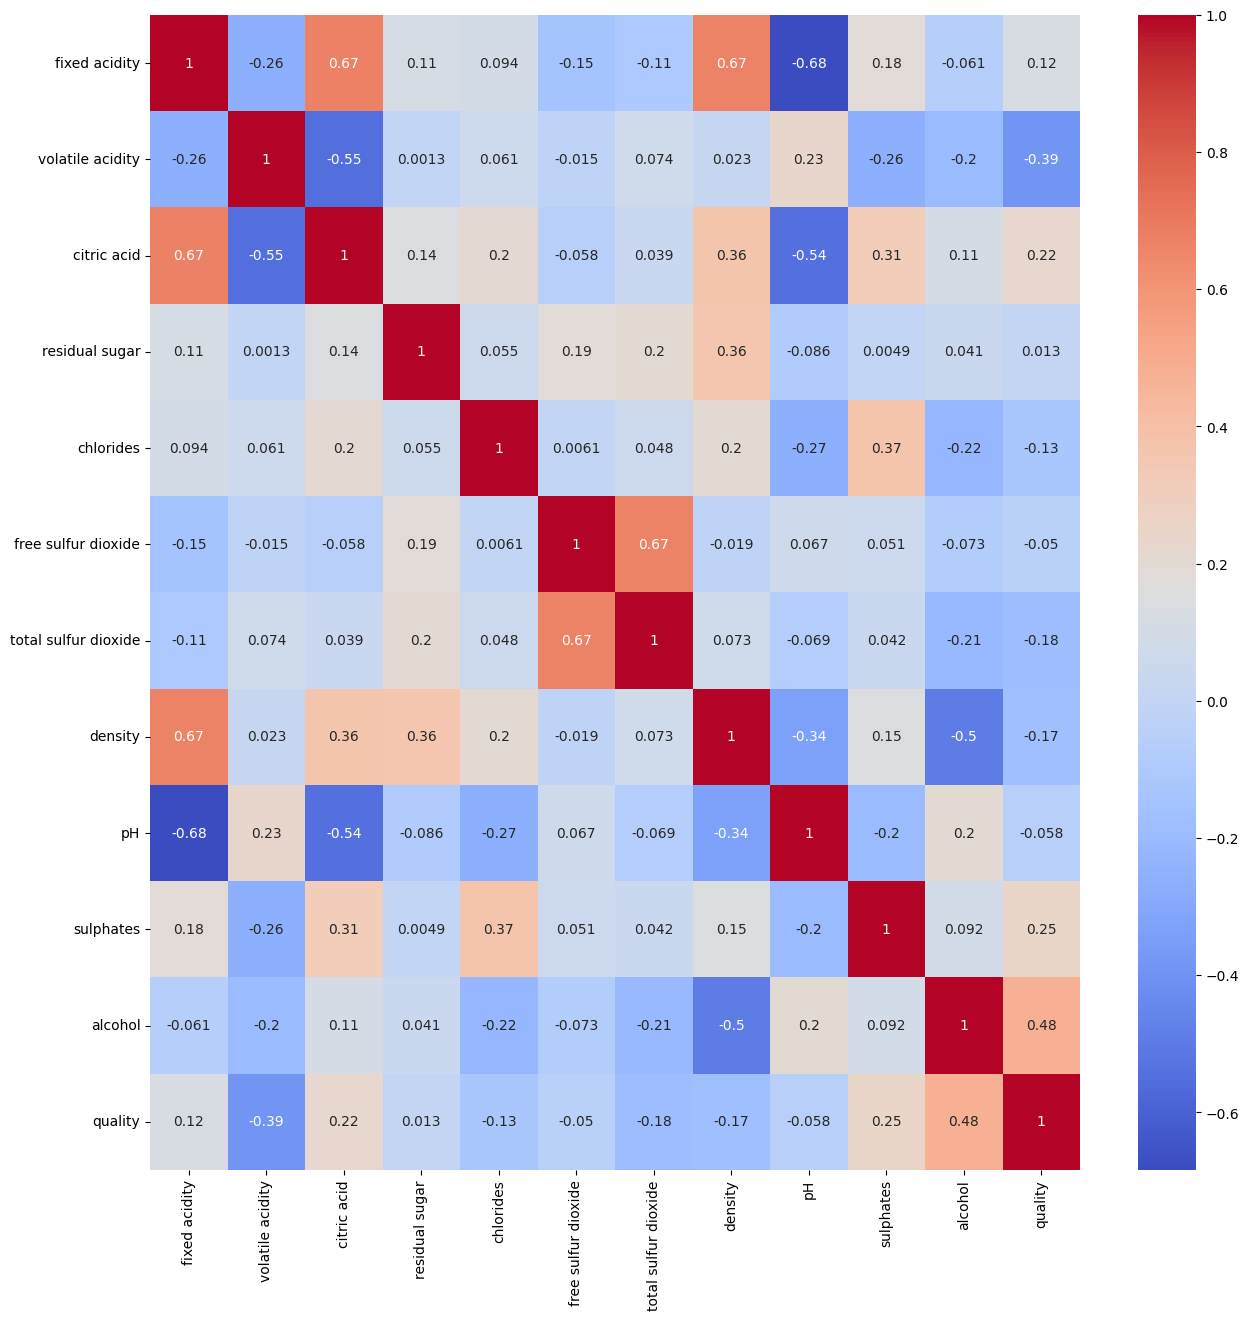

In [10]:
plt.figure(figsize=(15, 15))
sns.heatmap( df.drop('ID', axis=1).corr(), annot=True, cmap='coolwarm')

In [ ]:
<AxesSubplot:>

## Inferences from the heatmap
1.Fixed acidity has a strong  positive correlation with citric acid.
alcohol has a medium negative correlation with density. This means that averagely, drinks with high alcohol content have low density.

2.pH has a medium negative correlation with citric acid. This means that averagely, drinks with high Ph have low citric acid content. And this is because the higher the pH , the more basic the drink is.

3.Density has a strong positive correlation with fixed acidity. This means drinks with high acidity are likely to have high density.

<Axes: xlabel='quality', ylabel='Density'>

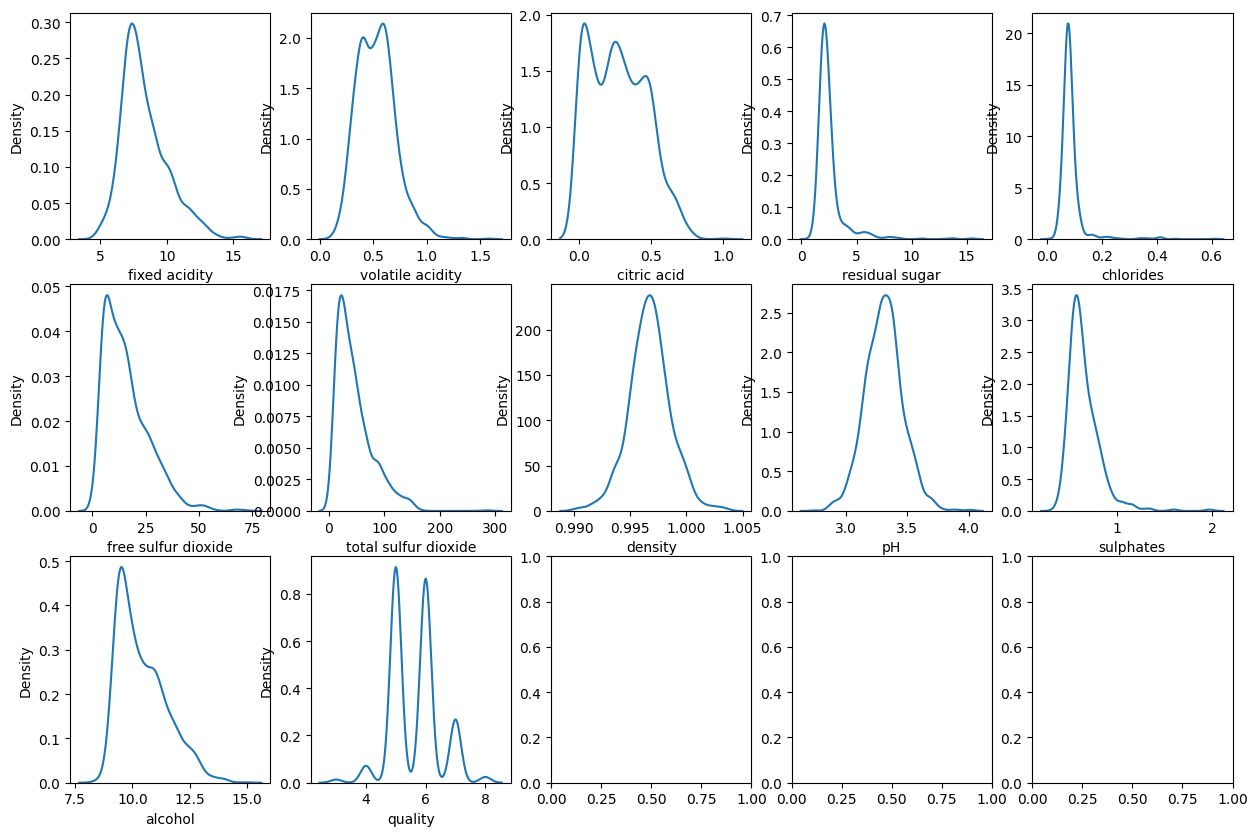

In [11]:
fig, axs = plt.subplots(ncols=5,nrows=3, figsize=(15, 10))

sns.kdeplot(data=df, x='fixed acidity', ax=axs[0,0])
sns.kdeplot(data=df, x='volatile acidity', ax=axs[0,1])
sns.kdeplot(data=df, x='citric acid', ax=axs[0,2])
sns.kdeplot(data=df, x='residual sugar', ax=axs[0,3])
sns.kdeplot(data=df, x='chlorides', ax=axs[0,4])
sns.kdeplot(data=df, x='free sulfur dioxide', ax=axs[1,0])
sns.kdeplot(data=df, x='total sulfur dioxide', ax=axs[1,1])
sns.kdeplot(data=df, x='density', ax=axs[1,2])
sns.kdeplot(data=df, x='pH', ax=axs[1,3])
sns.kdeplot(data=df, x='sulphates', ax=axs[1,4])
sns.kdeplot(data=df, x='alcohol', ax=axs[2,0])
sns.kdeplot(data=df, x='quality', ax=axs[2,1])


## DRAWING PAIRPLOT TO FIND THE RELATION BETWEEN FEATURES AND THE TARGET ATTRIBUTES

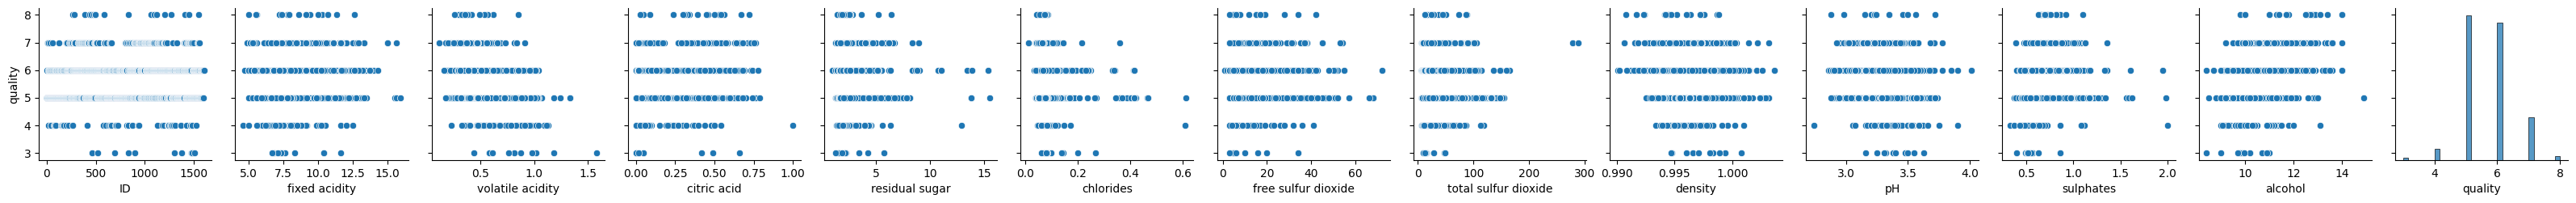

In [12]:
sns.pairplot(data=df, y_vars='quality')

From the pairplot, it shows that no strong correlation between 'quality' and the rest of the attributes.

## Drawing histogram for density attribute

<Axes: xlabel='density', ylabel='Count'>

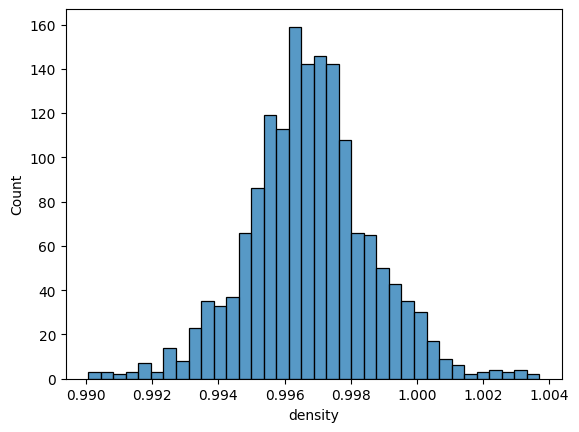

In [15]:
sns.histplot(df, x='density')